In [2]:
#将下面的字典创建为DataFrame
import pandas as pd
import numpy as np

data = {"grammer":["Python","C","Java","GO",np.nan,"SQL","PHP","Python"],
       "score":[1,2,np.nan,4,5,6,7,10]}
df = pd.DataFrame(data)
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [4]:
#提取含有字符串"Python"的行
df[df['grammer']=='Python']

,grammer,score
0,Python,1.0
7,Python,10.0


In [5]:
result = df['grammer'].str.contains("Python")
result.fillna(value=False,inplace=True)
df[result]

,grammer,score
0,Python,1.0
7,Python,10.0


In [6]:
#输出df的所有列名
print(df.columns)

Index(['grammer', 'score'], dtype='object')


In [7]:
#修改第二列列名为'popularity'
df.rename(columns={"score":"popularity"},inplace=True)
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [8]:
#统计grammer列中每种编程语言出现的次数
df["grammer"].value_counts()

Python    2
C         1
PHP       1
Java      1
SQL       1
GO        1
Name: grammer, dtype: int64

In [9]:
#将空值用上下值的平均值填充
df['popularity'] = df['popularity'].fillna(df['popularity'].interpolate())
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [10]:
#提取popularity列中值大于3的行
df[df["popularity"]>3]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [11]:
#按照grammer列进行去除重复值
df.drop_duplicates(["grammer"])

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0


In [12]:
#计算popularity列平均值
df["popularity"].mean()

4.75

In [13]:
#将grammer列转换为list
df["grammer"].to_list()

['Python', 'C', 'Java', 'GO', nan, 'SQL', 'PHP', 'Python']

In [14]:
#将DataFrame保存为EXCEL
df.to_excel("test.xlsx")

In [15]:
#查看数据行列数
df.shape

(8, 2)

In [16]:
#提取popularity列值大于3小于7的行
df[(df["popularity"]>3)&(df["popularity"]<7)]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0


In [17]:
#交换两列位置
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [18]:
cols = df.columns[[1,0]]
df = df[cols]
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [19]:
#提取popularity列最大值所在行
df[df['popularity'] == df['popularity'].max()]

,popularity,grammer
7,10.0,Python


In [20]:
#查看最后5行数据
df.tail()

,popularity,grammer
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [21]:
df.tail(3)

,popularity,grammer
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [22]:
#删除最后一行数据
df.drop([len(df)-1],inplace=True)
df

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP


In [23]:
#添加一行数据['Perl',6.6]
row = {'grammer':'Perl','popularity':6.6}
df = df.append(row,ignore_index=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,6.6,Perl


In [24]:
#对数据按照"popularity"列值的大小进行排序
df.sort_values("popularity",inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
7,6.6,Perl
6,7.0,PHP


In [25]:
#统计grammer列每个字符串的长度
df["grammer"]=df["grammer"].fillna("R")
df["len_str"]=df["grammer"].map(lambda x:len(x))
df

,popularity,grammer,len_str
0,1.0,Python,6
1,2.0,C,1
2,3.0,Java,4
3,4.0,GO,2
4,5.0,R,1
5,6.0,SQL,3
7,6.6,Perl,4
6,7.0,PHP,3


In [30]:
#读取本地EXCEL数据
df = pd.read_excel("D:/研一上资料/锻炼打卡/2.16打卡公示.xlsx")
df

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN
4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸
...,...,...,...,...,...,...,...,...,...,...,...
272,273,吴志彬,231320092,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN
274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN


In [31]:
df.head()

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN
4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸


In [38]:
print(df.groupby('学院：').mean())

                         编号：           学号：         联系电话：  您今日消耗的卡路里总和（Kcal）：  \
学院：                                                                            
人文社会科学学院          113.857143  2.738497e+08  1.598685e+10          564.428571   
先进制造学院与海洋学院       160.375000  6.886258e+08  1.624554e+10          261.937500   
化学学院              164.000000  1.521050e+08  1.576668e+10          106.800000   
化工学院              113.571429  6.907612e+07  1.584147e+10           76.428571   
厦门工艺美术学院          175.500000  2.317271e+08  1.691295e+10          404.500000   
土木工程学院            118.130435  1.056271e+08  1.669288e+10          123.521739   
外国语学院             103.000000  9.222534e+07  1.596806e+10           59.575000   
建筑与城乡规划学院         201.000000  1.634621e+08  1.513299e+10           97.285714   
数字中国研究院福建          46.000000  2.355200e+08  1.895623e+10          147.000000   
数学与统计学院           104.000000  4.778157e+07  1.785567e+10          120.333333   
机械工程及自动化学院        184.000000  2.226911e+

In [39]:
#查看索引、数据类型和内存信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
编号：                      277 non-null int64
姓名：                      277 non-null object
学号：                      277 non-null int64
联系电话：                    277 non-null int64
学院：                      277 non-null object
您今日选择的赛道（此题可多选）：_距离打卡    277 non-null object
您今日选择的赛道（此题可多选）：_原地打卡    277 non-null object
您今日选择的赛道（此题可多选）：_进步打卡    277 non-null object
您今日消耗的卡路里总和（Kcal）：       277 non-null float64
截至目前，您消耗卡路里总和（Kcal）：     277 non-null float64
备注                       18 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 23.9+ KB


In [40]:
#查看数值型列的汇总统计
df.describe()

,编号：,学号：,联系电话：,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：
count,277.00000,2.770000e+02,2.770000e+02,277.000000,277.000000
mean,139.00000,2.043150e+08,1.618398e+10,170.513538,2515.645740
std,80.10722,2.552721e+08,2.614859e+09,311.059210,3350.191545
min,1.00000,1.023003e+07,1.523296e+09,50.000000,63.000000
25%,70.00000,4.220223e+07,1.395842e+10,61.000000,1158.000000
50%,139.00000,1.023041e+08,1.592815e+10,89.000000,1709.000000
75%,208.00000,2.307200e+08,1.835001e+10,178.000000,2640.000000
max,277.00000,8.523035e+08,1.997167e+10,3180.000000,30782.000000


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("D:/研一上资料/锻炼打卡/2.16打卡公示.xlsx")
df

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN
4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸
...,...,...,...,...,...,...,...,...,...,...,...
272,273,吴志彬,231320092,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN
274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN


In [4]:
#按照‘截至目前，您消耗卡路里总和（Kcal）：’列对数据降序排列
df.sort_values('截至目前，您消耗卡路里总和（Kcal）：',ascending=False)

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
228,229,杭予责,12201611,13004403372,电气工程与自动化学院,选中,选中,未选中,2745.0,30782.0,NaN
242,243,李文杰,852303416,15259092519,先进制造学院与海洋学院,未选中,选中,未选中,1741.0,25840.0,NaN
239,240,石倩瑶,232927027,18960975923,人文社会科学学院,选中,选中,选中,3180.0,25121.0,NaN
215,216,马丽雯,72202102,18259350376,经济与管理学院,选中,选中,未选中,2125.0,24958.0,NaN
270,271,黄天豪,832303308,19859101408,梅努斯国际工程学院,未选中,选中,未选中,89.0,10650.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68,69,赵琳,220527038,15812196799,土木工程学院,未选中,选中,未选中,119.0,362.0,NaN
182,183,王璟,192200127,18350006283,法学院,未选中,选中,未选中,65.0,360.0,NaN
138,139,张诗佳,92200429,18305946620,外国语学院,选中,未选中,未选中,75.0,325.0,NaN
221,222,张书泽,112200332,13290388266,物理与信息工程学院 、微电子学院,选中,未选中,未选中,52.0,298.0,NaN


In [5]:
#取出第33行数据
df.loc[32]

编号：                               33
姓名：                              叶晓茜
学号：                         12301120
联系电话：                    15059741048
学院：                       电气工程与自动化学院
您今日选择的赛道（此题可多选）：_距离打卡             选中
您今日选择的赛道（此题可多选）：_原地打卡            未选中
您今日选择的赛道（此题可多选）：_进步打卡            未选中
您今日消耗的卡路里总和（Kcal）：               193
截至目前，您消耗卡路里总和（Kcal）：             951
备注                               NaN
Name: 32, dtype: object

In [6]:
#计算‘截至目前，您消耗卡路里总和（Kcal）：’列的中位数
np.median(df['截至目前，您消耗卡路里总和（Kcal）：'])

1709.0

In [10]:
#计算消耗卡路里总和最大值与最小值之差
df = pd.read_excel("D:/研一上资料/锻炼打卡/2.16打卡公示.xlsx")
df

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN
4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸
...,...,...,...,...,...,...,...,...,...,...,...
272,273,吴志彬,231320092,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN
274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN


In [11]:
df[['截至目前，您消耗卡路里总和（Kcal）：']].apply(lambda x:x.max()-x.min())

截至目前，您消耗卡路里总和（Kcal）：    30719.0
dtype: float64

In [12]:
#将第一行与最后一行拼接
pd.concat([df[:1],df[-2:-1]])

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN


In [13]:
#将第8行数据添加至末尾
df.append(df.iloc[7])

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN
4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸
...,...,...,...,...,...,...,...,...,...,...,...
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN
274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN
276,277,李司烁,230727051,15124905706,经济与管理学院,未选中,选中,未选中,52.0,1720.0,NaN


In [14]:
#查看每列的数据类型
df.dtypes

编号：                        int64
姓名：                       object
学号：                        int64
联系电话：                      int64
学院：                       object
您今日选择的赛道（此题可多选）：_距离打卡     object
您今日选择的赛道（此题可多选）：_原地打卡     object
您今日选择的赛道（此题可多选）：_进步打卡     object
您今日消耗的卡路里总和（Kcal）：       float64
截至目前，您消耗卡路里总和（Kcal）：     float64
备注                        object
dtype: object

In [15]:
#将学号列设置为索引
df.set_index("学号：")

,编号：,姓名：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注
学号：,,,,,,,,,,
42201414,1,欧亿辉,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN
228527042,2,刘毅,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN
12201213,3,李海锦,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN
852301321,4,陈可瞳,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN
231127203,5,张怡暄,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸
...,...,...,...,...,...,...,...,...,...,...
231320092,273,吴志彬,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN
221927076,274,左雨婷,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN
72208122,275,周霖岚,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN


In [17]:
#生成一个和df长度相同的随机数dataframe
df1 = pd.DataFrame(pd.Series(np.random.randint(1,10,277)))
df1

,0
0,9
1,7
2,7
3,5
4,4
...,...
272,9
273,1
274,4
275,8


In [18]:
#将上一题生成的dataframe与df合并
df = pd.concat([df,df1],axis=1)
df

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注,0
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN,9
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN,7
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN,7
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN,5
4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸,4
...,...,...,...,...,...,...,...,...,...,...,...,...
272,273,吴志彬,231320092,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN,9
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN,1
274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN,4
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN,8


In [20]:
#生成新的一列new为"截至目前，您消耗卡路里总和（Kcal）："列减去之前生成随机数列
df["new"] = df["截至目前，您消耗卡路里总和（Kcal）："] - df[0]
df

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注,0,new
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN,9,2592.0
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN,7,1007.0
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN,7,1656.0
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN,5,2282.0
4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸,4,985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,273,吴志彬,231320092,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN,9,577.0
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN,1,4066.0
274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN,4,1859.0
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN,8,1680.0


In [21]:
#检查数据中是否含有任何缺失值
df.isnull().values.any()

True

In [22]:
#将"截至目前，您消耗卡路里总和（Kcal）："列类型转换为浮点数
df["截至目前，您消耗卡路里总和（Kcal）："].astype(np.float64)

0      2601.0
1      1014.0
2      1663.0
3      2287.0
4       989.0
        ...  
272     586.0
273    4067.0
274    1863.0
275    1688.0
276    1720.0
Name: 截至目前，您消耗卡路里总和（Kcal）：, Length: 277, dtype: float64

In [23]:
#计算消耗总卡路里大于10000的次数
len(df[df['截至目前，您消耗卡路里总和（Kcal）：']>10000])

5

In [25]:
#查看有几种学院
df["学院："].nunique()

21

In [27]:
#提取卡路里列与new列的和大于6000的最后三行
df1 = df[['截至目前，您消耗卡路里总和（Kcal）：','new']]
rowsums = df1.apply(np.sum,axis=1)
res = df.iloc[np.where(rowsums>6000)[0][-3:],:]
res

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注,0,new
270,271,黄天豪,832303308,19859101408,梅努斯国际工程学院,未选中,选中,未选中,89.0,10650.0,NaN,2,10648.0
271,272,谢亦葳,42103138,13055829239,化工学院,选中,未选中,选中,79.0,7955.0,NaN,3,7952.0
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN,1,4066.0


In [28]:
#查看数据前三行
df.head(3)

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注,0,new
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN,9,2592.0
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN,7,1007.0
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN,7,1656.0


In [29]:
#查看每列数据缺失值情况
df.isnull().sum()

编号：                        0
姓名：                        0
学号：                        0
联系电话：                      0
学院：                        0
您今日选择的赛道（此题可多选）：_距离打卡      0
您今日选择的赛道（此题可多选）：_原地打卡      0
您今日选择的赛道（此题可多选）：_进步打卡      0
您今日消耗的卡路里总和（Kcal）：         0
截至目前，您消耗卡路里总和（Kcal）：       0
备注                       259
0                          0
new                        0
dtype: int64

In [30]:
#提取备注列含有空值的行
df[df['备注'].isnull()]

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注,0,new
0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN,9,2592.0
1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN,7,1007.0
2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN,7,1656.0
3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN,5,2282.0
5,6,黄晨毅,32201134,15280319089,数学与统计学院,未选中,选中,未选中,266.0,2713.0,NaN,3,2710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,273,吴志彬,231320092,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN,9,577.0
273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN,1,4066.0
274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN,4,1859.0
275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN,8,1680.0


In [31]:
#输出每列缺失值具体行数
for columname in df.columns:
    if df[columname].count() != len(df):
        loc = df[columname][df[columname].isnull().values==True].index.tolist()
        print('列名："{}",第{}行位置有缺失值'.format(columname,loc))

列名："备注",第[0, 1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 134, 136, 137, 138, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 

In [33]:
#绘制卡路里消耗总和列的折线图
import matplotlib.pyplot as plt

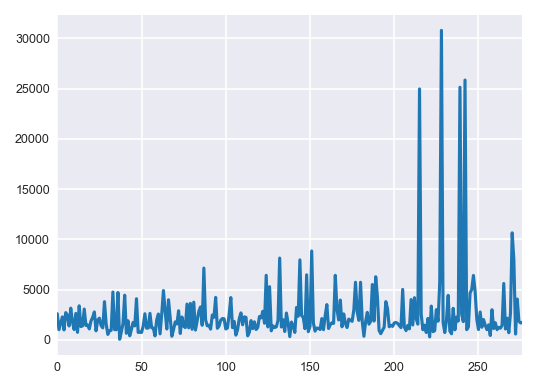

In [34]:
plt.style.use('seaborn-darkgrid')
plt.rc('font',size=6)
plt.rc('figure',figsize=(4,3),dpi=150)
df["截至目前，您消耗卡路里总和（Kcal）："].plot()

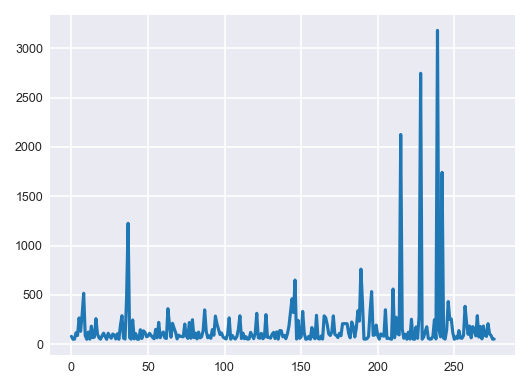

In [35]:
plt.plot(df["您今日消耗的卡路里总和（Kcal）："])

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32791 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-

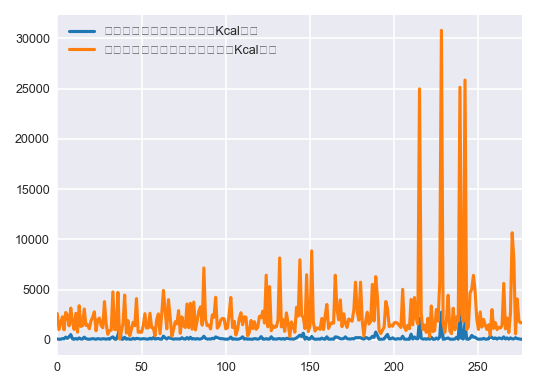

In [37]:
df[['您今日消耗的卡路里总和（Kcal）：','截至目前，您消耗卡路里总和（Kcal）：']].plot()

(array([262.,   9.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([  50.,  363.,  676.,  989., 1302., 1615., 1928., 2241., 2554.,
        2867., 3180.]),
 <a list of 10 Patch objects>)

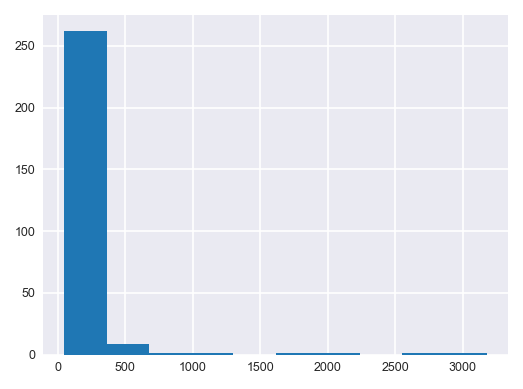

In [38]:
#绘制直方图
plt.hist(df["您今日消耗的卡路里总和（Kcal）："])

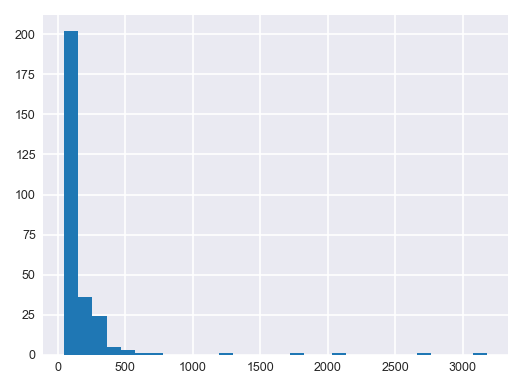

In [39]:
#让直方图更细致
df["您今日消耗的卡路里总和（Kcal）："].hist(bins=30)

In [40]:
#以data的列名创建一个dataframe
temp = pd.DataFrame(columns=df.columns.to_list())
temp

,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注,0,new


In [42]:
#重置df的行数
df = df.reset_index()
df

,index,编号：,姓名：,学号：,联系电话：,学院：,您今日选择的赛道（此题可多选）：_距离打卡,您今日选择的赛道（此题可多选）：_原地打卡,您今日选择的赛道（此题可多选）：_进步打卡,您今日消耗的卡路里总和（Kcal）：,截至目前，您消耗卡路里总和（Kcal）：,备注,0,new
0,0,1,欧亿辉,42201414,13599334686,化工学院,选中,未选中,未选中,80.0,2601.0,NaN,9,2592.0
1,1,2,刘毅,228527042,18307079727,先进制造学院与海洋学院,选中,未选中,未选中,50.0,1014.0,NaN,7,1007.0
2,2,3,李海锦,12201213,13960851725,电气工程与自动化学院,选中,未选中,未选中,51.0,1663.0,NaN,7,1656.0
3,3,4,陈可瞳,852301321,15960090548,先进制造学院与海洋学院,未选中,选中,选中,116.0,2287.0,NaN,5,2282.0
4,4,5,张怡暄,231127203,15280860172,物理与信息工程学院 、微电子学院,未选中,选中,未选中,88.0,989.0,视频未露脸,4,985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,272,273,吴志彬,231320092,13850504315,化学学院,选中,未选中,未选中,208.0,586.0,NaN,9,577.0
273,273,274,左雨婷,221927076,15701527144,法学院,未选中,选中,未选中,106.0,4067.0,NaN,1,4066.0
274,274,275,周霖岚,72208122,19305019812,数学与统计学院,未选中,选中,未选中,88.0,1863.0,NaN,4,1859.0
275,275,276,陈晓语,152102219,13348273376,建筑与城乡规划学院,未选中,选中,未选中,51.0,1688.0,NaN,8,1680.0


In [43]:
#导入并查看pandas与numpy版本
print(np.__version__)
print(pd.__version__)

1.16.5
0.25.1


In [44]:
#从numpy数组创建dataframe
tem = np.random.randint(1,100,20)
df1 = pd.DataFrame(tem)
df1

,0
0,97
1,11
2,84
3,97
4,68
5,4
6,88
7,30
8,6
9,93


In [45]:
tem = np.arange(0,100,5)
df2 = pd.DataFrame(tem)
df2

,0
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


In [46]:
tem = np.random.normal(0,1,20)
df3 = pd.DataFrame(tem)
df3

,0
0,1.028490
1,-0.139686
2,-0.516143
3,-0.792186
4,0.522593
5,1.419451
6,0.179447
7,-0.383464
8,0.417755
9,0.837604


In [47]:
#将df1,df2,df3按照行合并为新DataFrame
df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
df

,0
0,97.000000
1,11.000000
2,84.000000
3,97.000000
4,68.000000
5,4.000000
6,88.000000
7,30.000000
8,6.000000
9,93.000000


In [48]:
#将df1,df2,df3按照列合并为新DataFrame
df = pd.concat([df1,df2,df3],axis=1,ignore_index=True)
df

,0,1,2
0,97,0,1.028490
1,11,5,-0.139686
2,84,10,-0.516143
3,97,15,-0.792186
4,68,20,0.522593
5,4,25,1.419451
6,88,30,0.179447
7,30,35,-0.383464
8,6,40,0.417755
9,93,45,0.837604


In [49]:
#查看df所有数据的最小值、25%分位数、中位数、75%分位数、最大值
df.describe()

,0,1,2
count,20.000000,20.000000,20.000000
mean,50.650000,47.500000,0.363318
std,36.724114,29.580399,0.769616
min,2.000000,0.000000,-0.792186
25%,14.000000,23.750000,-0.296772
50%,49.000000,47.500000,0.367071
75%,88.250000,71.250000,0.828738
max,97.000000,95.000000,1.789834


In [50]:
print(np.percentile(df,q=[0,25,50,75,100]))

[-0.79218632  0.81414178 17.5        65.75       97.        ]


In [51]:
#修改列名为col1，col2，col3
df.columns=["col1","col2","col3"]
df

,col1,col2,col3
0,97,0,1.028490
1,11,5,-0.139686
2,84,10,-0.516143
3,97,15,-0.792186
4,68,20,0.522593
5,4,25,1.419451
6,88,30,0.179447
7,30,35,-0.383464
8,6,40,0.417755
9,93,45,0.837604


In [52]:
#提取第一列中不在第二列出现的数字
df['col1'][~df['col1'].isin(df['col2'])]

0     97
1     11
2     84
3     97
4     68
5      4
6     88
8      6
9     93
10     7
12    28
13    32
15    89
16     2
17    72
18    92
19    33
Name: col1, dtype: int32

In [53]:
#提取第一列和第二列出现频率最高的三个数字
temp = df["col1"].append(df["col2"])
temp.value_counts().index[:3]

Int64Index([65, 30, 15], dtype='int64')

In [54]:
#提取第一列中可以整除5的数字位置
np.argwhere(df['col1']%5==0)

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


array([[ 7],
       [11],
       [14]], dtype=int64)

In [55]:
#计算第一列数字前一个与后一个的差值
df["col1"].diff().tolist()

[nan,
 -86.0,
 73.0,
 13.0,
 -29.0,
 -64.0,
 84.0,
 -58.0,
 -24.0,
 87.0,
 -86.0,
 8.0,
 13.0,
 4.0,
 33.0,
 24.0,
 -87.0,
 70.0,
 20.0,
 -59.0]

In [56]:
#将col1，col2，col3三列顺序颠倒
df.ix[:, ::-1]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,col3,col2,col1
0,1.028490,0,97
1,-0.139686,5,11
2,-0.516143,10,84
3,-0.792186,15,97
4,0.522593,20,68
5,1.419451,25,4
6,0.179447,30,88
7,-0.383464,35,30
8,0.417755,40,6
9,0.837604,45,93


In [57]:
#提取第一列位置在1，10，15的数字
df["col1"].take([1,10,15])

1     11
10     7
15    89
Name: col1, dtype: int32

In [58]:
#查找第一列的局部最大值位置
tem = np.diff(np.sign(np.diff(df['col1'])))
np.where(tem == -2)[0] + 1

array([ 3,  6,  9, 15, 18], dtype=int64)

In [59]:
#按行计算df的每一行均值
df[["col1","col2","col3"]].mean(axis=1)

0     32.676163
1      5.286771
2     31.161286
3     37.069271
4     29.507531
5     10.139817
6     39.393149
7     21.538845
8     15.472585
9     46.279201
10    19.578073
11    23.153163
12    29.593073
13    32.551600
14    44.921771
15    54.548246
16    27.929945
17    52.438796
18    60.941928
19    42.574241
dtype: float64

In [60]:
#对第二列计算移动平均值
np.convolve(df['col2'],np.ones(3)/3,mode='valid')

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65.,
       70., 75., 80., 85., 90.])

In [61]:
#将数据按照第三列值的大小升序排列
df.sort_values("col3",inplace=True)
df

,col1,col2,col3
3,97,15,-0.792186
11,15,55,-0.540511
2,84,10,-0.516143
7,30,35,-0.383464
15,89,75,-0.355261
19,33,95,-0.277276
14,65,70,-0.234687
1,11,5,-0.139686
6,88,30,0.179447
17,72,85,0.316387


In [63]:
#将第一列大于50的数字修改为‘高’
df.col1[df["col1"]>50]="高"
df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,col1,col2,col3
3,高,15,-0.792186
11,15,55,-0.540511
2,高,10,-0.516143
7,30,35,-0.383464
15,高,75,-0.355261
19,33,95,-0.277276
14,高,70,-0.234687
1,11,5,-0.139686
6,高,30,0.179447
17,高,85,0.316387


In [64]:
#计算第二列与第三列之间的欧式距离
np.linalg.norm(df['col2']-df["col3"])

246.9255066528236